# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

<br><br>

# <center>Mini-Projeto 1 </center>
## Modelagem Preditiva para Identificação de Risco de Doença Hepática

<br>

### Etapas:

- Construção, Treinamento, Avaliação e Seleção de Modelos para <u>Classificação</u>

### Introdução:
- Vamos trabalhar agora em nosso primeiro Mini-Projeto de Machine Learning, cujo objetivo é fornecer um passo a passo completo do processo de construção, treinamento, avaliação e seleção de modelos para classificação. Este projeto será abordado de maneira integral, desde a definição do problema de negócio até as previsões com o modelo treinado.

### Contexto:

- O número de pacientes com doença hepática tem aumentado continuamente devido a fatores como consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados, e uso de drogas e anabolizantes. Em resposta a essa crescente preocupação de saúde pública, este mini-projeto visa construir um modelo de Machine Learning capaz de prever se um paciente irá ou não desenvolver uma doença hepática com base em várias características clínicas e demográficas. Este modelo pode ser extremamente útil para médicos, hospitais ou governos no planejamento de orçamentos de saúde e na criação de políticas de prevenção eficazes.

### Objetivo:

- Nosso objetivo é prever uma classe (sim ou não), usaremos aprendizado supervisionado para **classificação**,   criando   diferentes   versões   do   modelo   com   diferentes algoritmos e passaremos por todo o processo de Machine Learning de ponta a ponta. Usaremos como fonte de dados o dataset disponível no link a seguir.

### Dados:

https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

- Os dados para este projeto são provenientes do "Indian Liver Patient Dataset", disponível no link acima. Este conjunto de dados contém registros de pacientes hepáticos e não hepáticos coletados na Índia. A coluna "Dataset" atua como um rótulo de classe, dividindo os indivíduos em pacientes com doença hepática (1) ou sem a doença (2).

<br><br><br>
## Importando Pacotes

In [4]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Criação e Visualização de Gráficos
import seaborn as sns
from matplotlib import pyplot as plt


# Pacote do Python para Machine Learning
import sklearn

# Função model_selection do pacote sklearn
from sklearn.model_selection import train_test_split    # dividir os dados em treino e teste
from sklearn.model_selection import GridSearchCV        # técnica de utilização de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV  # técnica de utilização de hiperparâmetros
from sklearn.model_selection import cross_val_score     # validação cruzada (para avaliação do modelo)


## Pacotes do sklearn com os Algoritmos

# Função com Algoritmo de ML (Regressão Logística)
from sklearn.linear_model import LogisticRegression     

# Função com Algoritmo de ML (RandomForest)
from sklearn.ensemble import RandomForestClassifier

# Função com Algoritmo de ML (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Função com Algoritmo de ML (Árvores de Decisão)
from sklearn.tree import DecisionTreeClassifier

# Função com Algoritmo de ML (SVC)
from sklearn.svm import SVC

# Calcular as Métricas para Avaliação dos Modelos
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Salvar o modelo após o treinamento
import joblib
import pickle

# Indicando que os Gráficos apareçam no Jupyter Notebook
%matplotlib inline

# Mensagens de Aviso
import warnings
warnings.filterwarnings("ignore")

<br><br>
# Carregando o Conjunto de Dados

In [5]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [6]:
# Shape
dados.shape

(583, 11)

In [7]:
# Nome Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
# Visualiza uma Amostra
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
115,50,Male,7.3,3.6,1580,88,64,5.6,2.3,0.6,2
216,55,Male,0.9,0.2,116,36,16,6.2,3.2,1.0,2
356,33,Male,0.7,0.2,256,21,30,8.5,3.9,0.8,1
37,46,Female,14.2,7.8,374,38,77,4.3,2.0,0.8,1
221,47,Male,0.9,0.2,192,38,24,7.3,4.3,1.4,1


<br><br>
# Análise Exploratória de Dados
<br>

#### Verificando Tipo de Dados

In [13]:
# Tipo de Dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Visualizando Variáveis Categóricas e Numéricas

In [14]:
# Exibindo Variáveis Categóricas (filtrando)
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [16]:
# Exibindo Variáveis Numéricas (filtrando)
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

<br>

### Explorando Variáveis Numéricas
<br>

#### Resumo Estatístico

In [19]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<br>

#### Visualizando através de Gráficos

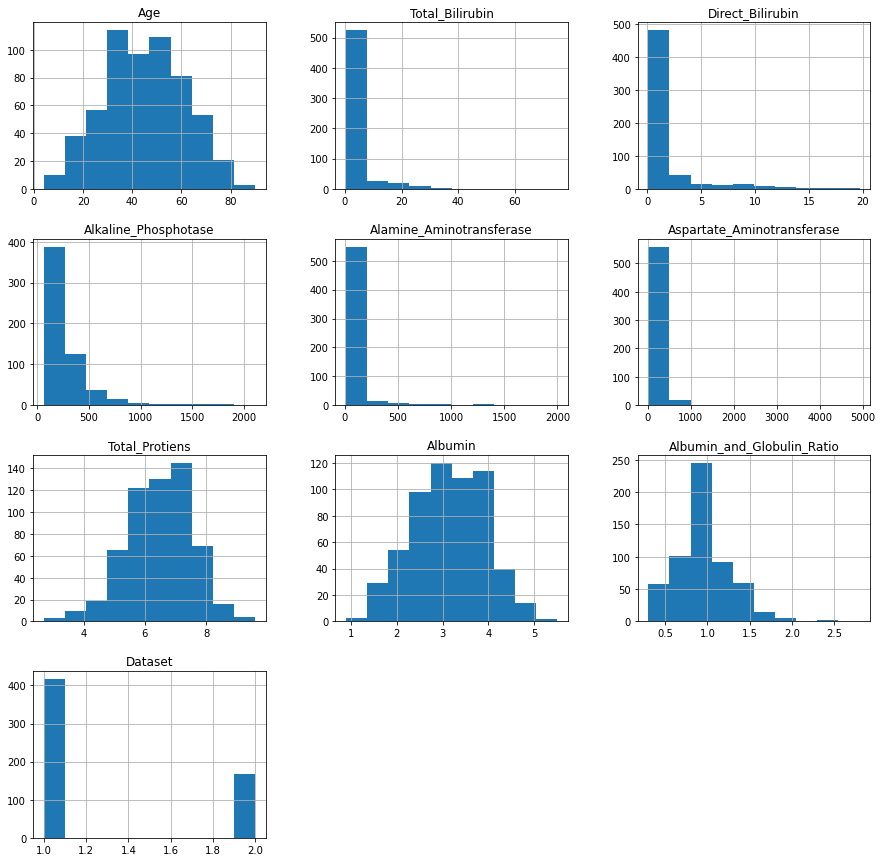

In [21]:
# Plot
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

#### Interpretando os Gráficos

- Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.
- A coluna dataset (variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

<br>

#### Ajustando coluna 'Dataset' (editando valores e renomeando)

In [22]:
# Criando Função para ajustar a variável target (modificando todos valores 2 para 0)
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [23]:
# Renomeando coluna 'Dataset' para 'Target'
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [25]:
# Visualizando
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
11,72,Male,2.7,1.3,260,31,56,7.4,3.0,0.6,1
350,37,Male,1.8,0.8,145,62,58,5.7,2.9,1.0,1
320,30,Female,0.7,0.2,63,31,27,5.8,3.4,1.4,1
185,38,Male,1.5,0.4,298,60,103,6.0,3.0,1.0,0
332,26,Male,7.1,3.3,258,80,113,6.2,2.9,0.8,1


<br>

#### Correlação

In [27]:
# Correlação entre as variáveis numéricas
dados.select_dtypes(include=[np.number]).corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


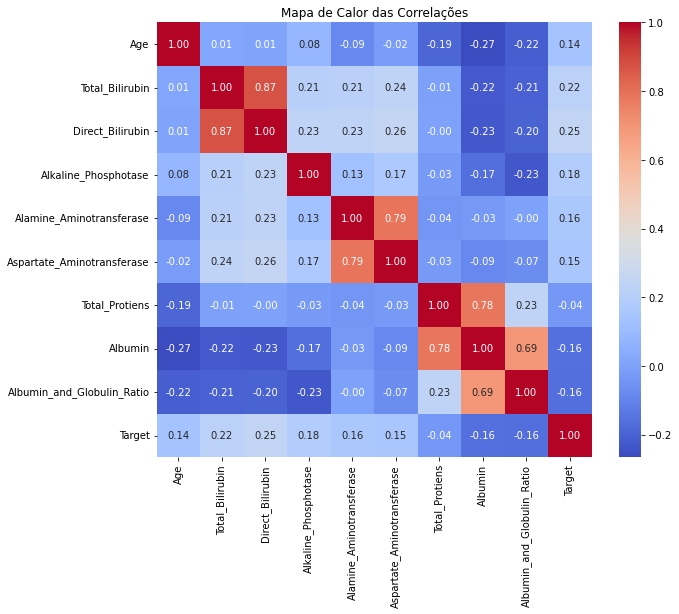

In [28]:
# Visualizando através de Gráfico

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

<br>

### Exploração Variável Categórica

<br>